# Tech Challenge

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importando os dados da tabela HTML

In [2]:
df = pd.read_html("http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view")[2]
df.dtypes

0    object
1    object
dtype: object

## Limpando os dados

In [3]:
# Renomeando colunas
df = df.rename(columns={0: "data", 1: "preco"})
df = df.iloc[1:]

# Formatando preço
df["preco"] = df["preco"].astype('int64')
df["preco"] = df["preco"] / 100

# Formatando data
df["data"] = pd.to_datetime(df["data"], format="%d/%m/%Y")

# Separando por ano e mês
df['ano'] = df['data'].dt.year
df["mes"] = df["data"].dt.month

In [4]:
df.head()

,data,preco,ano,mes
1,2024-04-15,90.84,2024,4
2,2024-04-12,93.12,2024,4
3,2024-04-11,91.49,2024,4
4,2024-04-10,91.57,2024,4
5,2024-04-09,92.13,2024,4


## Exibindo gráfico com variação histórica de preços

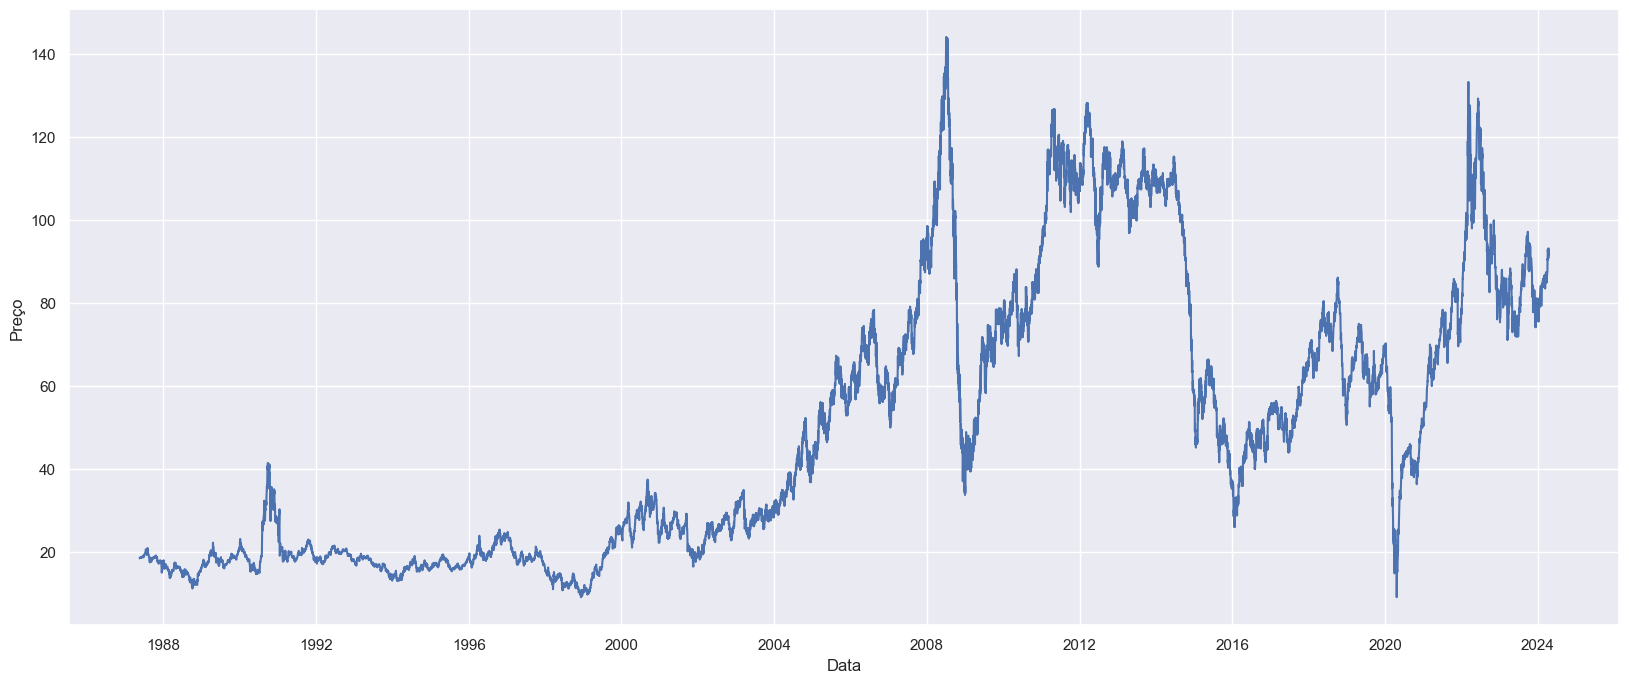

In [5]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="data", y="preco", data=df)
plt.xlabel("Data")
plt.ylabel("Preço")
plt.show()

## Exibindo gráfico com variação histórica dos últimos 5 anos

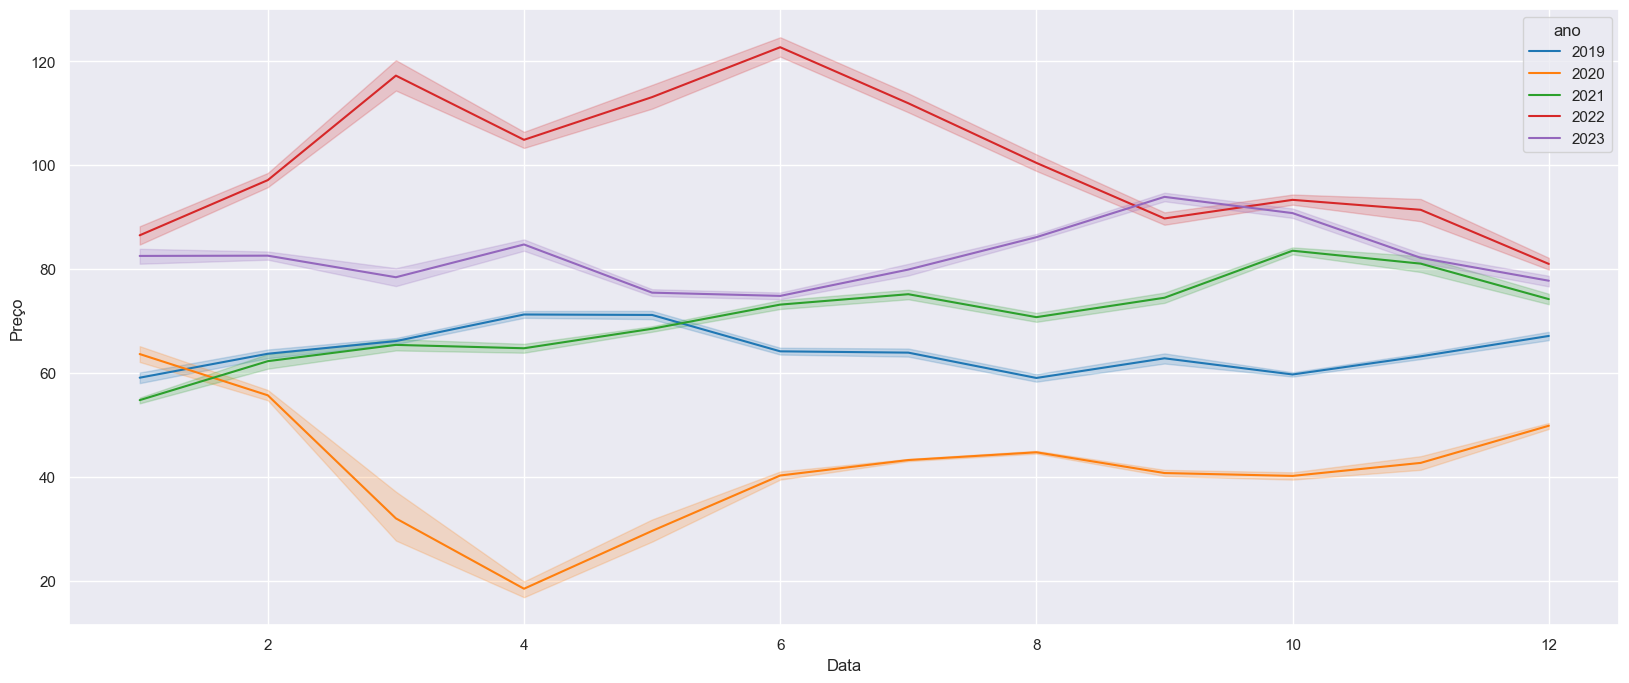

In [6]:
plt.figure(figsize=(20, 8))
sns.set_theme(style="darkgrid")

df_filtrado = df[df['ano'].isin([2019, 2020, 2021, 2022, 2023])]
sns.lineplot(x="mes", y="preco", hue="ano", data=df_filtrado, palette='tab10')
plt.xlabel("Data")
plt.ylabel("Preço")
plt.show()